In [1]:
import tsnet
import numpy as np
import matplotlib.pyplot as plt
import wntr

In [2]:
# Open an example network and create a transient model
inp_file='../networks/net3.inp'
tm = tsnet.network.TransientModel(inp_file)
wn = wntr.network.WaterNetworkModel(inp_file)

In [3]:
tm.set_wavespeed(1250.) # m/s
# # Set time options
dt = 0.01
tf = 50   # simulation period [s]
tm.set_time(tf,dt)
#tm.set_time(tf)

Simulation time step 0.01000 s


In [4]:
# MOC 分段
MOC_n=tsnet.network.discretize.cal_N(tm,dt)
MOC_n[1]

array([2.])

In [5]:
# simulate valve close
ts = 0 # valve closure start time [s]
tc = 0 # valve closure period [s]
se = 0 # end open percentage [s]
m = 2 # closure constant [dimensionless] --> curve of Valve closure operating rule
tm.valve_closure('V00000',[tc,ts,se,m])

In [6]:
# Initialize steady state simulation
t0=0 # start time
tm = tsnet.simulation.Initializer(tm,t0,'DD')

Total Time Step in this simulation 5000


In [7]:
# Transient simulation
results_obj = 'Net3NN' # name of the object for saving simulation results
friction = 'unsteady' # "steady" or "unsteady" or "quasi-steady", by default "steady"
tm = tsnet.simulation.MOCSimulator(tm,results_obj,friction)

Initial condition discrepancy of pressure (135.3506 m) on the J00049 node
Estimated simulation time 0:00:50.240000
Transient simulation completed 10 %...
Transient simulation completed 20 %...
Transient simulation completed 30 %...
Transient simulation completed 40 %...
Transient simulation completed 50 %...
Transient simulation completed 60 %...
Transient simulation completed 70 %...
Transient simulation completed 80 %...
Transient simulation completed 90 %...


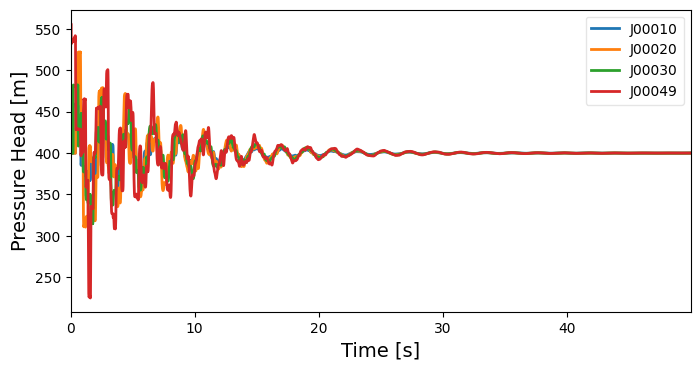

In [8]:
node = ['J00010','J00020','J00030','J00049']
tm.plot_node_head(node)

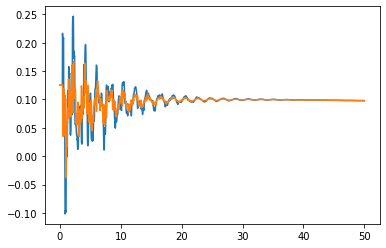

In [9]:
flow10=tm.get_link('P00010').start_node_flowrate

flow20=tm.get_link('P00018').start_node_flowrate
tt = tm.simulation_timestamps
plt.plot(tt,flow10)

plt.plot(tt,flow20)

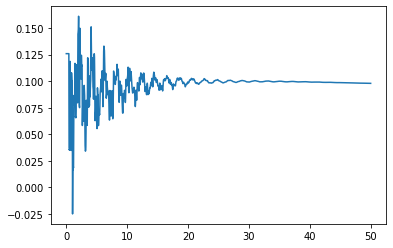

In [10]:
flow19=tm.get_link('P00018').end_node_flowrate
plt.plot(tt,flow19)

# create the database

In [11]:
num_nodes=wn.num_nodes # col
row=len(tt)
flows=np.zeros([row,num_nodes+4])
heads=np.zeros([row,num_nodes+4])
flows.shape

(5000, 55)

In [12]:
i=0
flow_ori=np.zeros([row,num_nodes])
for pipe_name, pipe in wn.pipes():

    flow_tmp=tm.get_link(pipe_name).end_node_flowrate
    flow_ori[:,i]=flow_tmp
    i+=1

In [13]:
flow_ori

array([[7.000e-01, 7.000e-01, 7.000e-01, ..., 3.000e-01, 3.000e-01, 0.000e+00],
       [7.000e-01, 7.000e-01, 7.000e-01, ..., 3.000e-01, 0.000e+00, 0.000e+00],
       [7.000e-01, 7.000e-01, 7.000e-01, ..., 3.000e-01, 0.000e+00, 0.000e+00],
       ...,
       [4.002e-01, 4.002e-01, 4.002e-01, ..., 1.579e-06, 0.000e+00, 0.000e+00],
       [4.001e-01, 4.001e-01, 4.002e-01, ..., 1.168e-06, 0.000e+00, 0.000e+00],
       [4.001e-01, 4.001e-01, 4.001e-01, ..., 7.887e-07, 0.000e+00, 0.000e+00]])

In [14]:
# 00001-J00019-J00020 and R00001
i=0
for pipe_name, pipe in wn.pipes():

    flow_tmp=tm.get_link(pipe_name).end_node_flowrate
    flows[:,i]=flow_tmp

    if i==0: # resivor
       flows[:,-5]=tm.get_link(pipe_name).start_node_flowrate
    if i==10: # # PIPE-10-start-pipe2-inflow-qi1
        flows[:,-4]=tm.get_link(pipe_name).start_node_flowrate
    if i==20: # # PIPE-20-start-pipe3-inflow-qi1
        flows[:,-3]=tm.get_link(pipe_name).start_node_flowrate
    if i==30: # PIPE-30-start-pipe4-inflow-qi2
        flows[:,-2]=tm.get_link(pipe_name).start_node_flowrate
    if i==40: # PIPE-40-start-pipe5-inflow-qi3
        flows[:,-1]=tm.get_link(pipe_name).start_node_flowrate

    i+=1
        #print(flows[:,i])

In [15]:
flows

array([[ 7.000e-01,  7.000e-01,  7.000e-01, ...,  4.742e-01,  2.580e-02,  3.000e-01],
       [ 7.000e-01,  7.000e-01,  7.000e-01, ...,  4.742e-01,  2.580e-02,  3.000e-01],
       [ 7.000e-01,  7.000e-01,  7.000e-01, ...,  4.742e-01,  2.580e-02,  3.000e-01],
       ...,
       [ 4.002e-01,  4.002e-01,  4.002e-01, ...,  2.022e-01, -2.129e-03,  2.157e-05],
       [ 4.001e-01,  4.001e-01,  4.002e-01, ...,  2.022e-01, -2.131e-03,  1.891e-05],
       [ 4.001e-01,  4.001e-01,  4.001e-01, ...,  2.022e-01, -2.134e-03,  1.632e-05]])

In [16]:
max(flows[:,9]-flows[:,-1])

0.8242901977143204

In [17]:
for pipe_name, pipe in wn.pipes():
    print(pipe_name, pipe)

P00000 P00000
P00001 P00001
P00002 P00002
P00003 P00003
P00004 P00004
P00005 P00005
P00006 P00006
P00007 P00007
P00008 P00008
P00009 P00009
P00010 P00010
P00011 P00011
P00012 P00012
P00013 P00013
P00014 P00014
P00015 P00015
P00016 P00016
P00017 P00017
P00018 P00018
P00019 P00019
P00020 P00020
P00021 P00021
P00022 P00022
P00023 P00023
P00024 P00024
P00025 P00025
P00026 P00026
P00027 P00027
P00028 P00028
P00029 P00029
P00030 P00030
P00031 P00031
P00032 P00032
P00033 P00033
P00034 P00034
P00035 P00035
P00036 P00036
P00037 P00037
P00038 P00038
P00039 P00039
P00040 P00040
P00041 P00041
P00042 P00042
P00043 P00043
P00044 P00044
P00045 P00045
P00046 P00046
P00047 P00047
P00048 P00048
P00049 P00049


In [18]:
j=0
for node_name in wn.node_name_list:
    head_tmp=tm.get_node(node_name).head
    heads[:,j]=head_tmp
    j+=1

In [19]:
heads

array([[399.988, 399.975, 399.963, ...,   0.   ,   0.   ,   0.   ],
       [399.988, 399.975, 399.963, ...,   0.   ,   0.   ,   0.   ],
       [399.988, 399.975, 399.963, ...,   0.   ,   0.   ,   0.   ],
       ...,
       [399.999, 399.998, 399.997, ...,   0.   ,   0.   ,   0.   ],
       [399.999, 399.998, 399.997, ...,   0.   ,   0.   ,   0.   ],
       [399.999, 399.998, 399.996, ...,   0.   ,   0.   ,   0.   ]])

In [20]:
wn.node_name_list

['J00001',
 'J00002',
 'J00003',
 'J00004',
 'J00005',
 'J00006',
 'J00007',
 'J00008',
 'J00009',
 'J00010',
 'J00011',
 'J00012',
 'J00013',
 'J00014',
 'J00015',
 'J00016',
 'J00017',
 'J00018',
 'J00019',
 'J00020',
 'J00021',
 'J00022',
 'J00023',
 'J00024',
 'J00025',
 'J00026',
 'J00027',
 'J00028',
 'J00029',
 'J00030',
 'J00031',
 'J00032',
 'J00033',
 'J00034',
 'J00035',
 'J00036',
 'J00037',
 'J00038',
 'J00039',
 'J00040',
 'J00041',
 'J00042',
 'J00043',
 'J00044',
 'J00045',
 'J00046',
 'J00047',
 'J00048',
 'J00049',
 'J00050',
 'R00001']

In [21]:
# t-head-flow the same as case0.csv from YJW
data_cols=2*(num_nodes+4)+1
data=np.zeros([row,data_cols])
data[:,0]=np.asarray(tt)
data[:,1:data_cols:2]=heads
data[:,2:data_cols:2]=flows

In [22]:
data[:5,:]

array([[0.000e+00, 4.000e+02, 7.000e-01, 4.000e+02, 7.000e-01, 4.000e+02, 7.000e-01, 4.000e+02, 7.000e-01, 3.999e+02, 7.000e-01, 3.999e+02, 7.000e-01, 3.999e+02, 7.000e-01, 3.999e+02, 7.000e-01, 3.999e+02, 7.000e-01, 3.999e+02, 7.000e-01, 3.999e+02, 1.258e-01, 3.998e+02, 1.258e-01, 3.998e+02,
        1.258e-01, 3.998e+02, 1.258e-01, 3.998e+02, 1.258e-01, 3.998e+02, 1.258e-01, 3.998e+02, 1.258e-01, 3.998e+02, 1.258e-01, 3.997e+02, 1.258e-01, 3.997e+02, 1.258e-01, 3.999e+02, 4.742e-01, 3.998e+02, 4.742e-01, 3.998e+02, 4.742e-01, 3.998e+02, 4.742e-01, 3.998e+02, 4.742e-01, 3.998e+02,
        4.742e-01, 3.998e+02, 4.742e-01, 3.997e+02, 4.742e-01, 3.997e+02, 4.742e-01, 3.997e+02, 4.742e-01, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02, 2.580e-02, 3.997e+02,
        2.580e-02, 3.997e+02, 2.580e-02, 3.996e+02, 3.000e-01, 3.996e+02, 3.000e-01, 3.996e+02, 3.000e-01, 3.995e+02, 

In [23]:
# save to csv
np.savetxt('demo3.csv',data,fmt='%.4f',delimiter=',')